In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# 1. Define the Robust Bi-Tempered Logistic Loss
def bi_tempered_logistic_loss(y_true, y_pred, t1=0.5, t2=1.0):
    """
    Bi-Tempered Logistic Loss Function.

    Arguments:
    y_true -- Ground truth labels (one-hot encoded).
    y_pred -- Predictions from the model.
    t1, t2 -- Temperature parameters.
    """
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.clip_by_value(y_pred, 1e-7, 1 - 1e-7)  # To avoid log(0) or log(1)

    loss = t1 * tf.math.log(1 + tf.math.exp(-t2 * y_true * y_pred))
    return tf.reduce_mean(loss)


In [ ]:
# 2. Build a simple Neural Network
def create_model(input_shape=(784,), num_classes=10):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=input_shape))

    # Add hidden layers (fully connected)
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.2))  # Dropout for regularization
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.2))

    # Output layer (for multi-class classification)
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model


In [ ]:
# 3. Compile the model with the custom loss
model = create_model()

model.compile(optimizer='adam',
              loss=lambda y_true, y_pred: bi_tempered_logistic_loss(y_true, y_pred, t1=0.5, t2=1.0),
              metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [ ]:
# 4. Load a sample dataset (MNIST for example)
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize to [0, 1]
x_train = x_train.reshape(-1, 784)  # Flatten images for the fully connected network
x_test = x_test.reshape(-1, 784)

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


In [ ]:
# 5. Train the model and save the history
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7955 - loss: 0.3319 - val_accuracy: 0.9432 - val_loss: 0.3287
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9323 - loss: 0.3289 - val_accuracy: 0.9520 - val_loss: 0.3285
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9473 - loss: 0.3286 - val_accuracy: 0.9629 - val_loss: 0.3283
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9543 - loss: 0.3285 - val_accuracy: 0.9647 - val_loss: 0.3283
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9574 - loss: 0.3284 - val_accuracy: 0.9655 - val_loss: 0.3282
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9618 - loss: 0.3283 - val_accuracy: 0.9692 - val_loss: 0.3282
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9636 - loss: 0.3283 - val_accuracy: 0.9666 - val_loss: 0.3282
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9651 - loss: 0.3282 

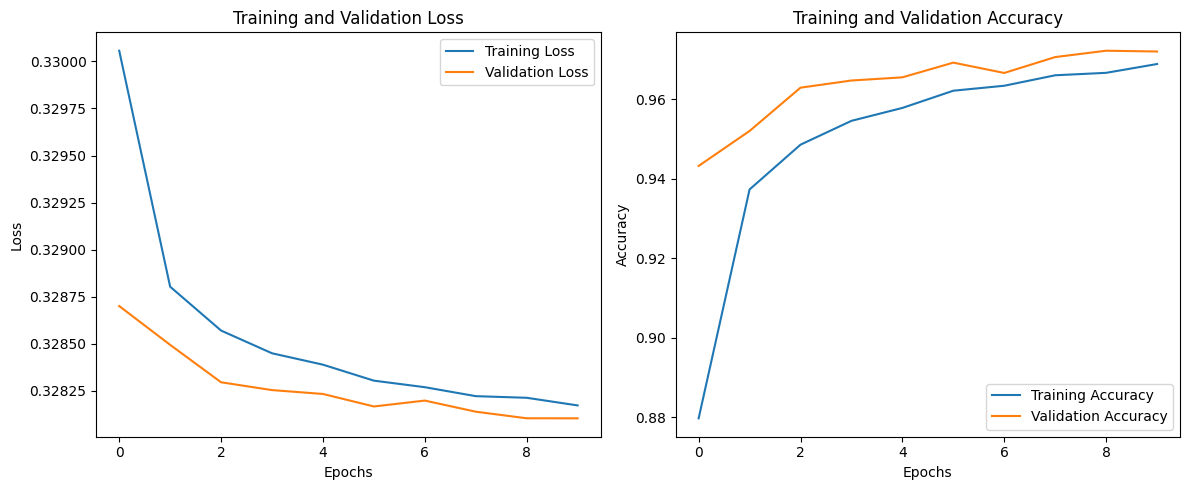

In [ ]:
# 7. Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9688 - loss: 0.3282
Test Loss: 0.32810452580451965, Test Accuracy: 0.972000002861023


In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models


In [2]:
def bi_tempered_logistic_loss(y_true, y_pred, t1=0.5, t2=1.0):
    """
    Bi-Tempered Logistic Loss Function for multi-class classification.

    Arguments:
    y_true -- Ground truth labels (one-hot encoded).
    y_pred -- Predictions from the model.
    t1, t2 -- Temperature parameters that control the loss's sharpness and scale.
    """
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.clip_by_value(y_pred, 1e-7, 1 - 1e-7)
    loss = t1 * tf.math.log(1 + tf.math.exp(-t2 * y_true * y_pred))
    return tf.reduce_mean(loss)


In [3]:
def create_model(input_shape=(784,), num_classes=10):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=input_shape))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model


In [4]:
model = create_model()

model.compile(optimizer='adam',
              loss=lambda y_true, y_pred: bi_tempered_logistic_loss(y_true, y_pred, t1=0.5, t2=1.0),
              metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [5]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize images to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Flatten images
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [6]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7948 - loss: 0.3318 - val_accuracy: 0.9454 - val_loss: 0.3287
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9369 - loss: 0.3288 - val_accuracy: 0.9505 - val_loss: 0.3285
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9499 - loss: 0.3286 - val_accuracy: 0.9586 - val_loss: 0.3284
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9534 - loss: 0.3285 - val_accuracy: 0.9642 - val_loss: 0.3282
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9573 - loss: 0.3284 - val_accuracy: 0.9676 - val_loss: 0.3282
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9628 - loss: 0.3283 - val_accuracy: 0.9677 - val_loss: 0.3282
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9647 - loss: 0.3283 - val_accuracy: 0.9706 - val_loss: 0.3281
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9663 - loss: 0.3282 

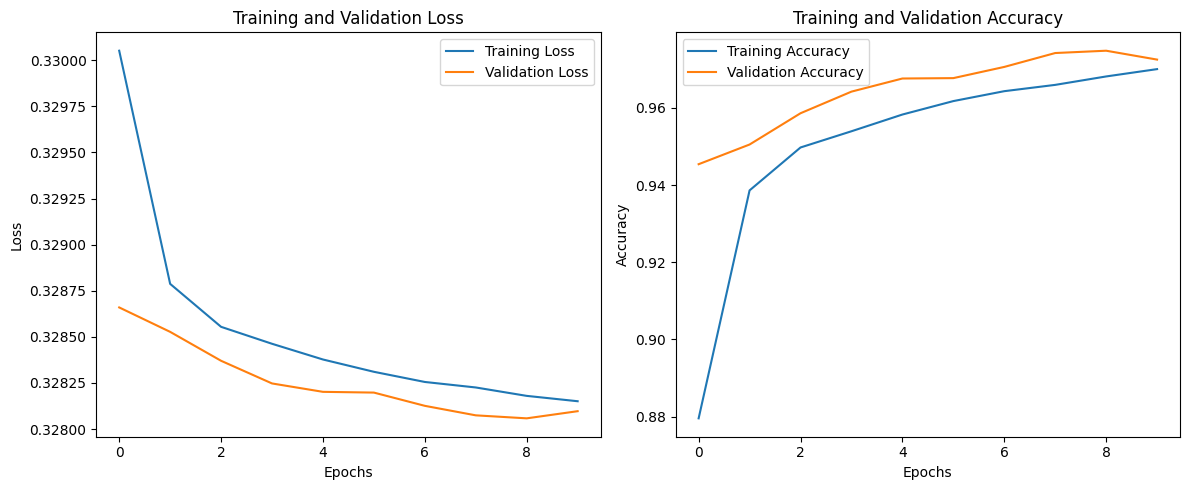

In [7]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [8]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9678 - loss: 0.3282
Test Loss: 0.3280969560146332, Test Accuracy: 0.9725000262260437


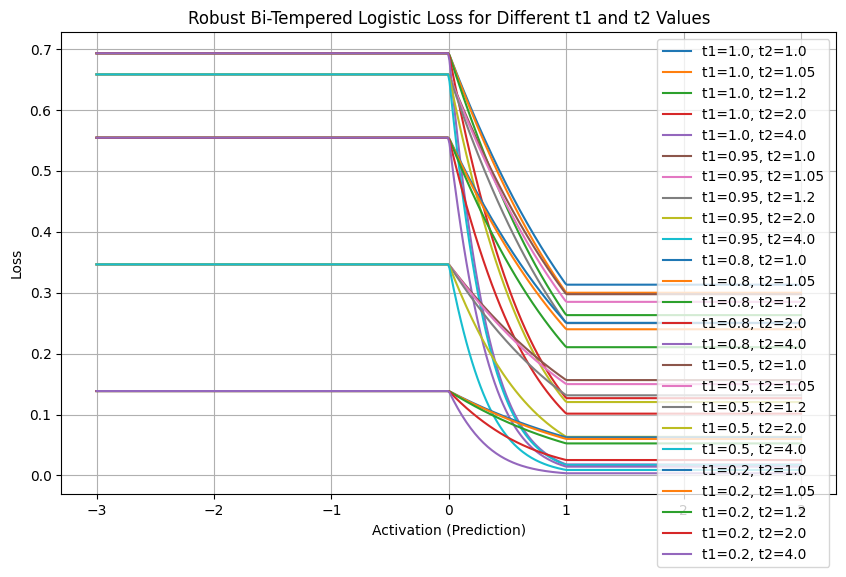

In [9]:
def bi_tempered_logistic_loss_vis(activation_range, t1, t2):
    y_true = np.array([1])  # True class = 1 for visualization
    y_pred = np.clip(activation_range, 1e-7, 1 - 1e-7)
    loss = t1 * np.log(1 + np.exp(-t2 * y_true * y_pred))
    return loss

activation_range = np.linspace(-3, 3, 500)
t1_values = [1.0, 0.95, 0.80, 0.50, 0.20]
t2_values = [1.0, 1.05, 1.20, 2.00, 4.00]

plt.figure(figsize=(10, 6))
for t1 in t1_values:
    for t2 in t2_values:
        loss_values = bi_tempered_logistic_loss_vis(activation_range, t1, t2)
        plt.plot(activation_range, loss_values, label=f"t1={t1}, t2={t2}")

plt.title("Robust Bi-Tempered Logistic Loss for Different t1 and t2 Values")
plt.xlabel("Activation (Prediction)")
plt.ylabel("Loss")
plt.legend(loc="upper right")
plt.grid(True)
plt.show()
